In [2]:
import pickle
import numpy as np
from collections import defaultdict

import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt


label_size=28
tick_size=24
lw=5
alph=0.7

In [3]:
approach_path = "/home/bschroed/Documents/projects/restraintmaker/devtools/otherScripts/a_benchmark_algorithms"
input_path=approach_path+"/out/out_state.obj"
f = open(input_path, "rb")
d_dict = pickle.load(f)

In [4]:
print(len(d_dict))


13


In [5]:
#Data Preperation
particles = []
partic_key = None


timing = {}
volume ={}
distance = {}
for it in d_dict:
    clouds =  d_dict[it]
    ttiming = defaultdict(list)
    tvolume = defaultdict(list)
    tdistance = defaultdict(list)
    tvolstd =  defaultdict(list)
    tdisstd =  defaultdict(list)

    if len(particles) == 0:
        partic_key = list(sorted(clouds, key=lambda x: int(x.split("_")[-1])))
        particles = [int(x.split("_")[-1]) for x in partic_key]

    for cloud in partic_key:
        methods = clouds[cloud]
        method_keys = methods.keys()
        for method in methods:
            ttiming[method].append(methods[method]['t'])
            tvolume[method].append(methods[method]['volume'])
            tdistance[method].append(methods[method]['distance'])

    for method in method_keys:
        if(method in timing):
            timing[method]["iterations"].update({it: np.array(ttiming[method])})
            volume[method]["iterations"].update({it: np.array(tvolume[method])})
            distance[method]["iterations"].update({it: np.array(tdistance[method])})
        else:
            timing.update({method: {'iterations':{it: np.array(ttiming[method])}}})
            volume.update({method: {'iterations':{it: np.array(tvolume[method])}}})
            distance.update({method: {'iterations':{it: np.array(tdistance[method])}}})


##Final Stat:
keys = list(timing.keys())
for method in keys:
    method_data = timing[method]["iterations"]
    iteration_matrix = np.array([method_data[i] for i in method_data])
    timing[method].update({"avg": np.mean(iteration_matrix, axis=0),
                   "std": np.std(iteration_matrix, axis=0)})

    #Volume
    method_data = volume[method]["iterations"]
    iteration_matrix = np.array([method_data[i] for i in method_data])
    volume[method].update({"avg": np.mean(iteration_matrix, axis=0),
                   "std": np.std(iteration_matrix, axis=0)})
    #Distance
    method_data = distance[method]["iterations"]
    iteration_matrix = np.array([method_data[i] for i in method_data])
    distance[method].update({"avg": np.mean(iteration_matrix, axis=0),
                   "std": np.std(iteration_matrix, axis=0)})
pass

#relable:


In [9]:
timing.keys()

dict_keys(['greedy_shortest', 'brute_force_ch', 'brute_force_dist', 'random'])

In [23]:
list(zip(particles, timing['greedy_shortest']["avg"]))

[(6, 0.0013806153846153849),
 (7, 0.0021661538461538463),
 (8, 0.003229),
 (9, 0.004834076923076923),
 (10, 0.008471307692307693),
 (11, 0.010541307692307692),
 (12, 0.013587846153846152),
 (13, 0.018089076923076923),
 (14, 0.02373661538461538),
 (15, 0.031215)]

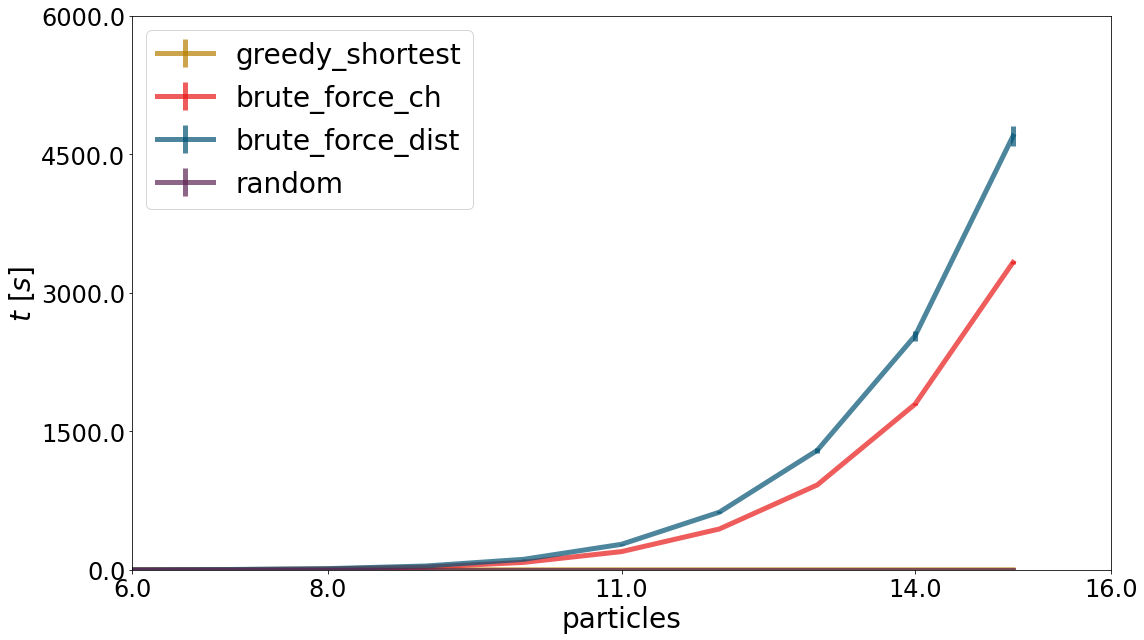

In [6]:
### Timing

fig, ax = plt.subplots(ncols=1, facecolor="white", figsize=[16,9])

c = ["#B57E00", "#E81717", "#005272", "#5D2453"]
for i, method in enumerate(timing):
    ax.errorbar(x=particles, y=timing[method]["avg"], yerr=timing[method]["std"],
                label=method, color=c[i], lw=lw, alpha=alph)

ax.set_ylabel("$t~[s]$", fontsize=label_size)
ax.set_xlabel("particles", fontsize=label_size)

y=np.round(np.linspace(0, 6000, 5))
ax.set_ylim(min(y), max(y))
ax.set_yticks(y)
ax.set_yticklabels(y, fontsize=tick_size)

x=np.round(np.linspace(6, 16, 5))
ax.set_xlim(min(x), max(x))
ax.set_xticks(x)
ax.set_xticklabels(x, fontsize=tick_size)

ax.legend(fontsize=label_size)

fig.tight_layout()


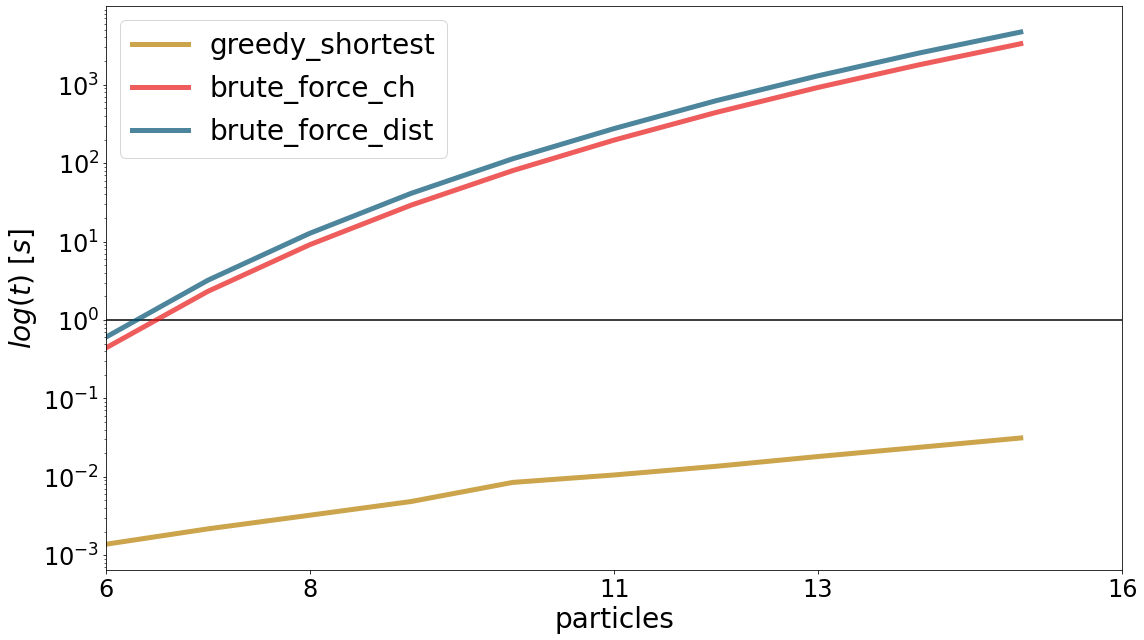

In [16]:
### Timing

fig, ax = plt.subplots(ncols=1, facecolor="white", figsize=[16,9])

c = ["#B57E00", "#E81717", "#005272", "#5D2453"]
for i, method in enumerate(timing):
    if('random' == method):
        continue
    ax.errorbar(x=particles, y=timing[method]["avg"],  label=method,
                lw=lw, alpha=alph, color=c[i])

ax.set_ylabel("$log(t)~[s]$", fontsize=label_size)
ax.set_xlabel("particles", fontsize=label_size)


ax.ticklabel_format(axis="y", style="scientific")
ax.set_yscale('log')
plt.yticks(fontsize=tick_size)

x=np.round(np.linspace(6, 16, 5, dtype=int))
ax.set_xlim(min(x), max(x))
ax.set_xticks(x)
ax.set_xticklabels(x, fontsize=tick_size)

ax.hlines(xmin=6, xmax=16, y=1, color="k", zorder=-10)
ax.legend(fontsize=label_size)

fig.tight_layout()

fig.savefig("./out/algorithms_timings.png", dpi=600)




4


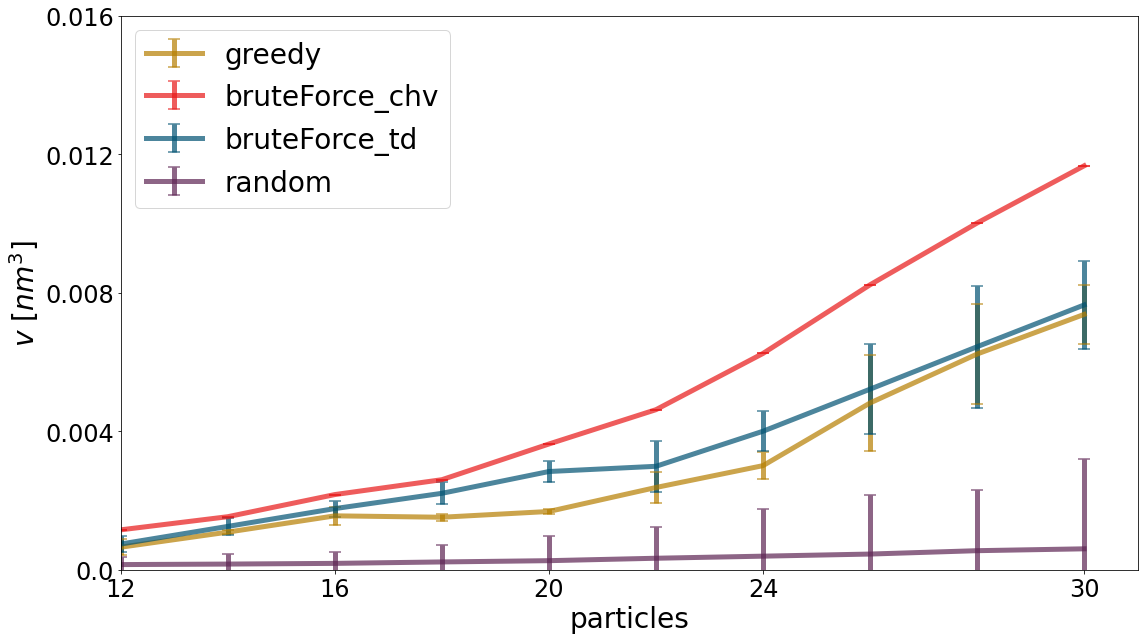

In [35]:
### Convex Hull

fig, ax = plt.subplots(ncols=1, facecolor="white", figsize=[16,9])

c = ["#B57E00", "#E81717", "#005272", "#5D2453"]
for i, method in enumerate(timing):
    val = np.array(list(volume[method]['iterations'].values()))
    std = volume[method]["std"]-volume["bruteForce_chv"]["std"]
    ax.errorbar(x=particles, y=volume[method]["avg"]/1000, yerr=std/1000,
                label=method,lw=lw, alpha=alph, capthick=1.5, capsize=6, color=c[i])

ax.set_ylabel("$v~[nm^3]$", fontsize=label_size)
ax.set_xlabel("particles", fontsize=label_size)

y=np.round(np.linspace(0, 15.5, 5))/1000
ax.set_ylim(min(y), max(y))
ax.set_yticks(y)
ax.set_yticklabels(y, fontsize=tick_size)

x=np.round(np.linspace(6, 15, 5, dtype=int))
ax.set_xlim(min(x), max(x)+0.5)
ax.set_xticks(x)
ax.set_xticklabels(x*2, fontsize=tick_size)

ax.legend(fontsize=label_size)

fig.tight_layout()

fig.savefig("./out/restraint_volumes_algorithms.png", dpi=600)

print(len(volume))

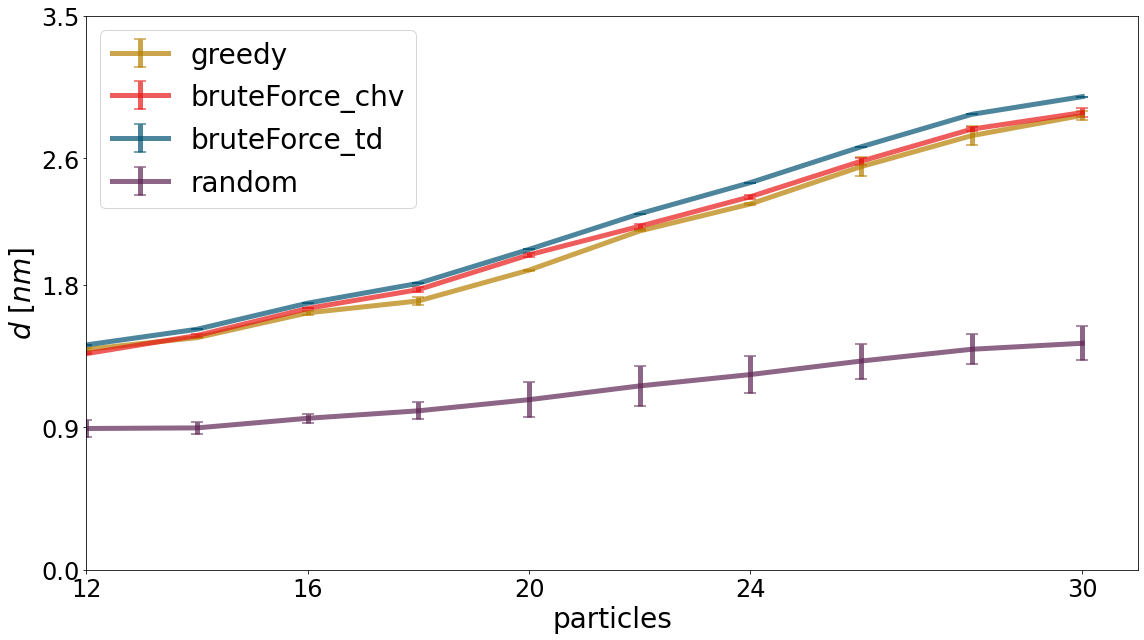

In [33]:
### Distance

fig, ax = plt.subplots(ncols=1, facecolor="white", figsize=[16,9])

c = ["#B57E00", "#E81717", "#005272", "#5D2453"]
for i, method in enumerate(timing):
    std = distance[method]["std"]-distance["bruteForce_td"]["std"]

    ax.errorbar(x=particles, y=distance[method]["avg"]/10, yerr=std/10,
                label=method, lw=lw, alpha=alph,  color=c[i]
                , capthick=1.5, capsize=6)

ax.set_ylabel("$d~[nm]$", fontsize=label_size)
ax.set_xlabel("particles", fontsize=label_size)

y=np.round(np.linspace(0, 35, 5))/10
ax.set_ylim(min(y), max(y))
ax.set_yticks(y)
ax.set_yticklabels(y, fontsize=tick_size)

x=np.round(np.linspace(6, 15, 5, dtype=int))
ax.set_xlim(min(x), max(x)+0.5)
ax.set_xticks(x)
ax.set_xticklabels(x*2, fontsize=tick_size)

ax.legend(fontsize=label_size)

fig.tight_layout()
fig.savefig("./out/restraint_distance_algorithms.png", dpi=600)

In [19]:
len(d_dict)

13